In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan
dataset = pd.read_csv("D:/Documents/Desktop/Practikum/realKnownCause/realKnownCause/ambient_temperature_system_failure.csv")

<AxesSubplot:xlabel='timestamp'>

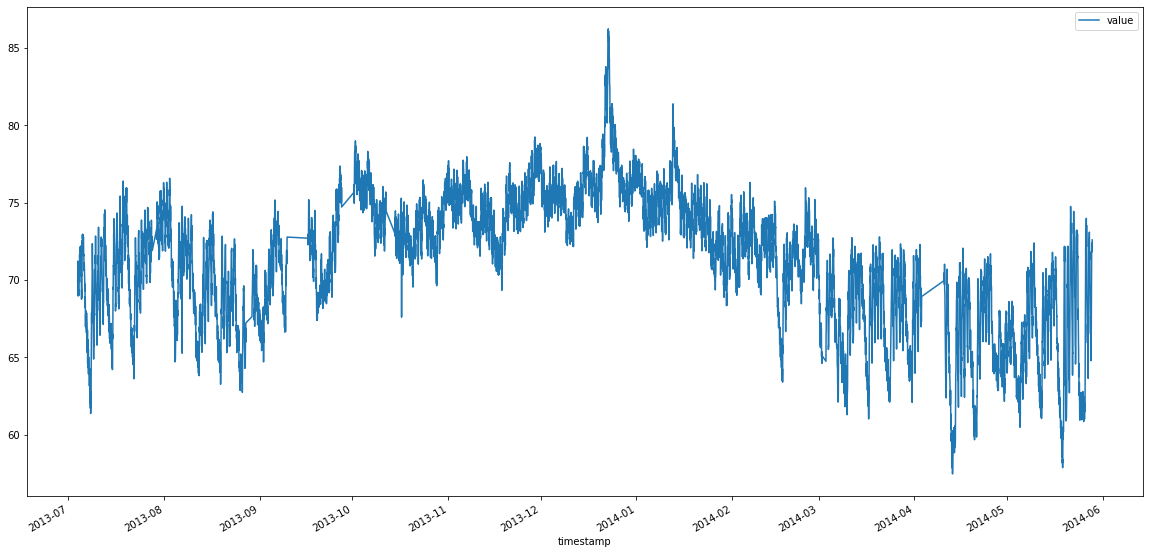

In [9]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],format='%Y-%m-%d %H:%M:%S')
dp=dataset.copy()
dp.plot(x='timestamp', y='value',figsize=(20, 10))

<AxesSubplot:>

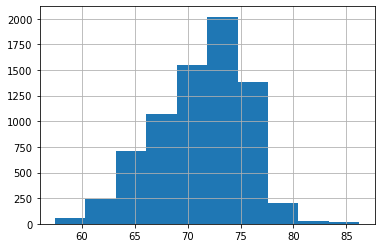

In [10]:
dp['value'].hist()

In [11]:
dl=[]
dataset['Hour'] = dataset['timestamp'].dt.hour 
dataset['day of week'] = dataset['timestamp'].dt.dayofweek 
for i in dataset['Hour']:
    if i>=0 and i<=11:
        dl.append('0')
    else :
        dl.append('1')        
dataset['daylight']=dl
dataset['is weekend']=dataset['day of week']>4
dataset['year'] = dataset['timestamp'].dt.year
dataset['month']=dataset['timestamp'].dt.month
dataset.head(100)
# am-0,pm-1

,timestamp,value,Hour,day of week,daylight,is weekend,year,month
0,2013-07-04 00:00:00,69.880835,0,3,0,False,2013,7
1,2013-07-04 01:00:00,71.220227,1,3,0,False,2013,7
2,2013-07-04 02:00:00,70.877805,2,3,0,False,2013,7
3,2013-07-04 03:00:00,68.959400,3,3,0,False,2013,7
4,2013-07-04 04:00:00,69.283551,4,3,0,False,2013,7
...,...,...,...,...,...,...,...,...
95,2013-07-07 23:00:00,64.246634,23,6,1,True,2013,7
96,2013-07-08 00:00:00,62.480785,0,0,0,False,2013,7
97,2013-07-08 01:00:00,62.030554,1,0,0,False,2013,7
98,2013-07-08 02:00:00,63.411560,2,0,0,False,2013,7


<AxesSubplot:>

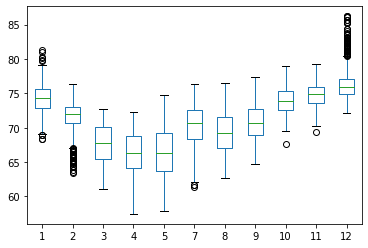

In [12]:
dataset.pivot(columns='month', values='value').plot(kind='box')

In [13]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(dataset)
ds_train
ds_test


,timestamp,value,Hour,day of week,daylight,is weekend,year,month
1915,2013-10-05 16:00:00,76.154735,16,5,1,True,2013,10
3072,2013-11-25 19:00:00,76.124269,19,0,1,False,2013,11
6758,2014-05-07 11:00:00,67.068975,11,2,0,False,2014,5
715,2013-08-04 03:00:00,67.599385,3,6,0,True,2013,8
6025,2014-03-30 17:00:00,65.750050,17,6,1,True,2014,3
...,...,...,...,...,...,...,...,...
3127,2013-11-28 02:00:00,78.342997,2,3,0,False,2013,11
6642,2014-05-02 15:00:00,68.368755,15,4,1,False,2014,5
6684,2014-05-04 09:00:00,63.379616,9,6,0,True,2014,5
1234,2013-08-25 18:00:00,63.391833,18,6,1,True,2013,8


In [15]:
#There aren't any missings
n= 0
for val in dataset['value']:
    try:
        float(val)
    except ValueError:
        dataset.loc[cnt, 'value'] = nan
    n += 1
dataset.isnull().values.any()

False

<AxesSubplot:>

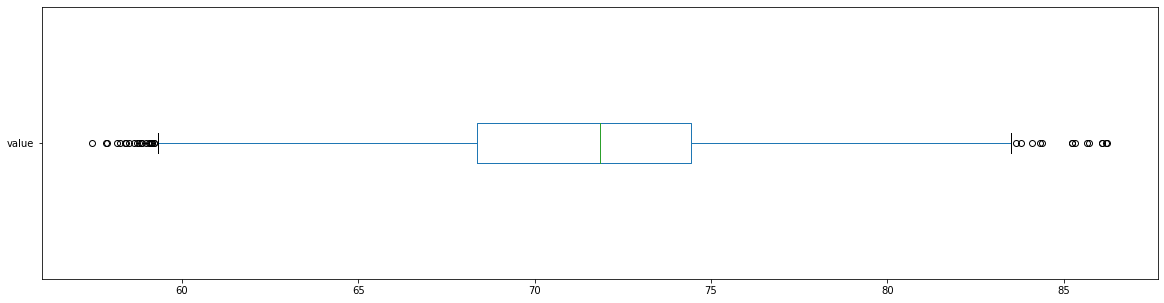

In [16]:
#all values are float
dataset['value'].plot.box(vert=False, figsize=(20, 5))

In [17]:
Q1 = dataset['value'].quantile(0.25)
Q3 = dataset['value'].quantile(0.75)
IQR = Q3 - Q1
out=dataset[(dataset['value'] < (Q1 - 1.5 * IQR)) |(dataset['value'] > (Q3 + 1.5 * IQR))]
out
#outliers

,timestamp,value,Hour,day of week,daylight,is weekend,year,month
3702,2013-12-22 01:00:00,83.780995,1,6,0,True,2013,12
3718,2013-12-22 17:00:00,84.390932,17,6,1,True,2013,12
3719,2013-12-22 18:00:00,85.227685,18,6,1,True,2013,12
3720,2013-12-22 19:00:00,86.094888,19,6,1,True,2013,12
3721,2013-12-22 20:00:00,86.204189,20,6,1,True,2013,12
3722,2013-12-22 21:00:00,86.223213,21,6,1,True,2013,12
3723,2013-12-22 22:00:00,85.649437,22,6,1,True,2013,12
3724,2013-12-22 23:00:00,86.074710,23,6,1,True,2013,12
3725,2013-12-23 00:00:00,85.326165,0,0,0,False,2013,12
3726,2013-12-23 01:00:00,85.705990,1,0,0,False,2013,12


In [18]:
out.count()

timestamp      35
value          35
Hour           35
day of week    35
daylight       35
is weekend     35
year           35
month          35
dtype: int64

In [19]:
dp.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


In [20]:
dataset.nunique()

timestamp      7267
value          7267
Hour             24
day of week       7
daylight          2
is weekend        2
year              2
month            11
dtype: int64

In [21]:
dp_lst = dataset['timestamp'].to_list()

delta = dp_lst[-1] - dp_lst[0]
periods = delta.components[0]*24+delta.components[1]+1
test_s = pd.date_range(dp_lst[0], periods=periods, freq="H")
test_lst = test_s.to_list()
missing_lst = list(set(test_lst) - set(dp_lst))
missing_lst.sort()
#missing_lst
#missing dates

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

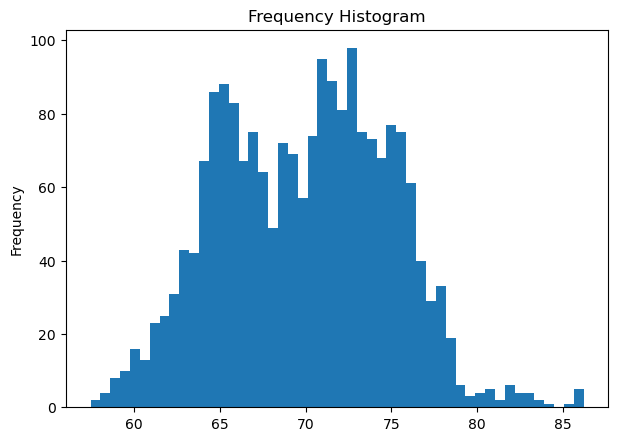

In [22]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5),'figure.dpi':100})
plt.hist(dataset.loc[dataset['is weekend']==True]['value'],bins=50)
plt.gca().set(title='Frequency Histogram',ylabel='Frequency')

In [29]:
from sklearn import preprocessing
valh=['value','Hour']
data=dataset.copy()
min_max_scaler = preprocessing.StandardScaler()
data[valh] = min_max_scaler.fit_transform(data[valh])
#data = pd.DataFrame(np_scaled)
data

,timestamp,value,Hour,day of week,daylight,is weekend,year,month
0,2013-07-04 00:00:00,-0.320586,-1.661537,3,0,False,2013,7
1,2013-07-04 01:00:00,-0.005228,-1.517172,3,0,False,2013,7
2,2013-07-04 02:00:00,-0.085851,-1.372807,3,0,False,2013,7
3,2013-07-04 03:00:00,-0.537536,-1.228442,3,0,False,2013,7
4,2013-07-04 04:00:00,-0.461215,-1.084077,3,0,False,2013,7
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,0.265532,-0.073523,2,0,False,2014,5
7263,2014-05-28 12:00:00,0.219090,0.070841,2,1,False,2014,5
7264,2014-05-28 13:00:00,0.189332,0.215206,2,1,False,2014,5
7265,2014-05-28 14:00:00,0.137218,0.359571,2,1,False,2014,5


[1 1 1 ... 1 1 1]


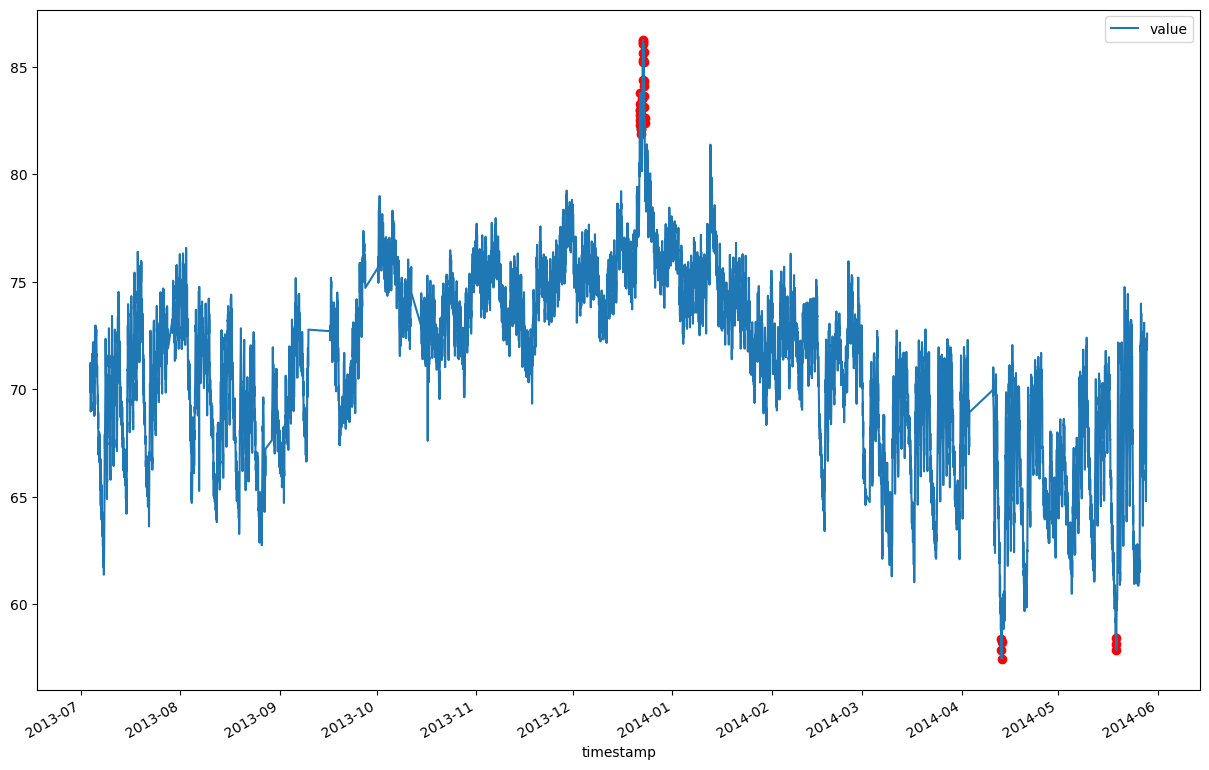

In [42]:
#Isolation forest
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.005)
iso_result=iso.fit_predict(data['value'].values.reshape(-1,1))
print(iso_result)
isofor=pd.DataFrame()
isofor['timestamp']=dataset['timestamp']
isofor['value'] = dataset['value']

#Inliers are 1, outliers are -1
isofor['anomaly']  = [1 if i==-1 else 0 for i in iso_result]
f=isofor[isofor['anomaly']==1]
isofor.plot(x='timestamp', y='value', figsize=(15,10))
plt.scatter(x=f.timestamp, y=f.value, color='red')

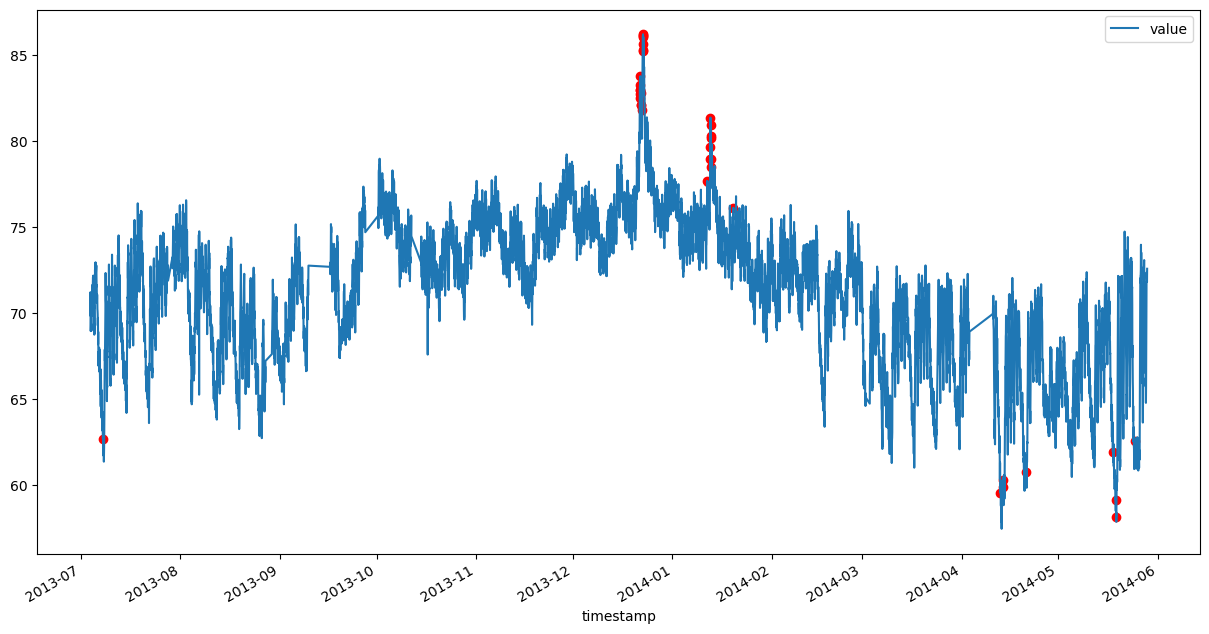

In [43]:
#Isolation Forest for all features
X = dataset.copy().loc[:,'value':'month']
#X.drop('t', axis=1, inplace=True)
iso = iso.fit(X)
iso_all = X.copy()
iso_all['scores'] = iso.predict(X)
iso_all['timestamp'] = dataset['timestamp']
iso_all['anomaly'] = [0 if x>0 else 1 for x in iso_all['scores']]
q=iso_all[iso_all['anomaly']==1]
iso_all.plot(x='timestamp', y='value', figsize=(15,8))
plt.scatter(x=q.timestamp, y=q.value, color='red')

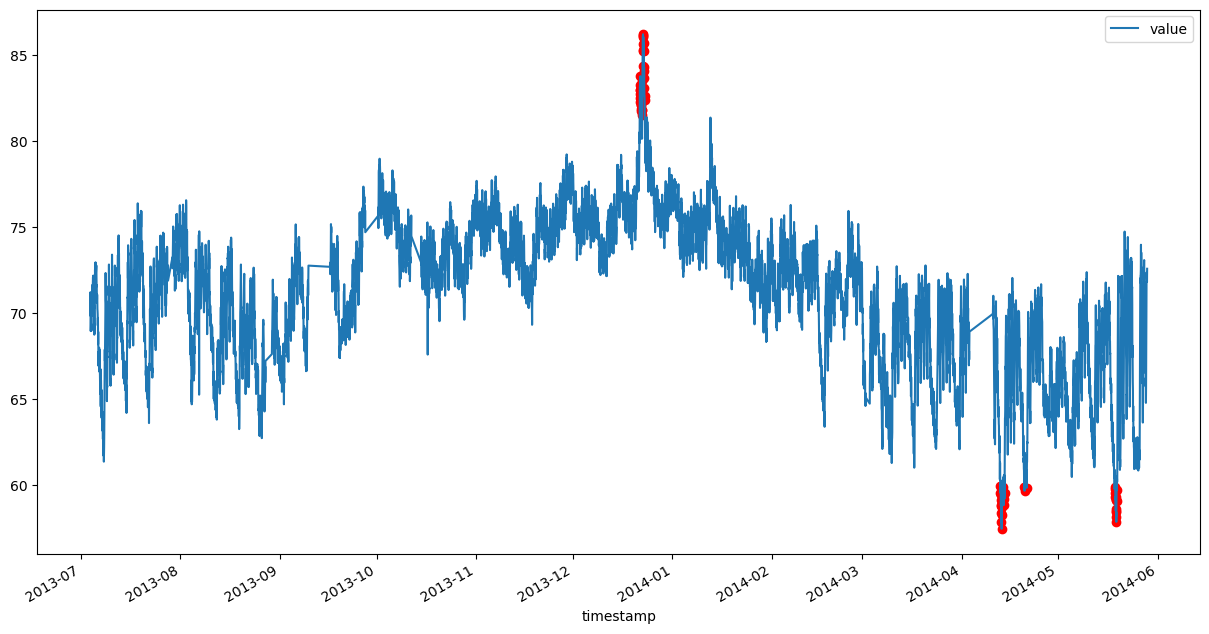

In [45]:
#One Class SVM 
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.01, gamma=0.000001)
svm_res=svm.fit_predict(dataset['value'].values.reshape(-1,1))
svm_result=pd.DataFrame()
svm_result['timestamp']=dataset['timestamp']
svm_result['value'] = dataset['value']
svm_result['anomaly']  = [1 if i==-1 else 0 for i in svm_res]
svm_result.plot(x='timestamp', y='value', figsize=(15,8))
sv=svm_result[svm_result['anomaly']==1]
plt.scatter(x=sv.timestamp, y=sv.value, color='red')

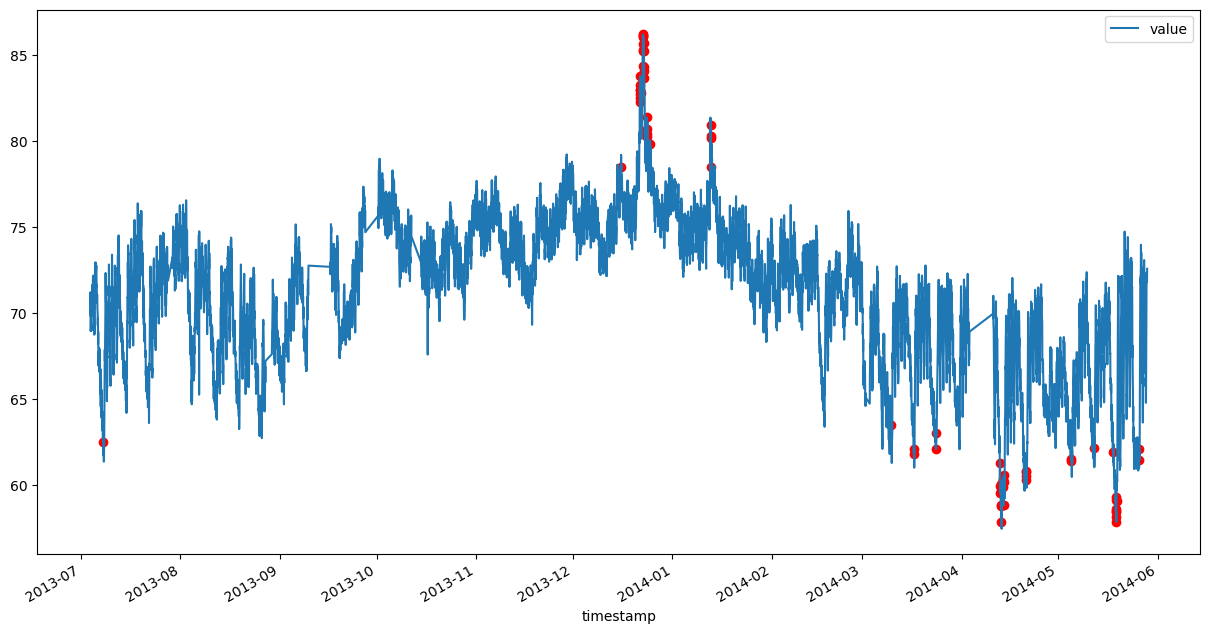

In [47]:
#One Class SVM for all features
svm = svm.fit(X)
svm_all = X.copy()
svm_all['scores'] = svm.predict(X)
svm_all['timestamp'] = dataset['timestamp']
svm_all['anomaly'] = [0 if x>0 else 1 for x in svm_all['scores']]
e=svm_all[svm_all['anomaly']==1]
svm_all.plot(x='timestamp', y='value', figsize=(15,8))
plt.scatter(x=e.timestamp, y=e.value, color='red')

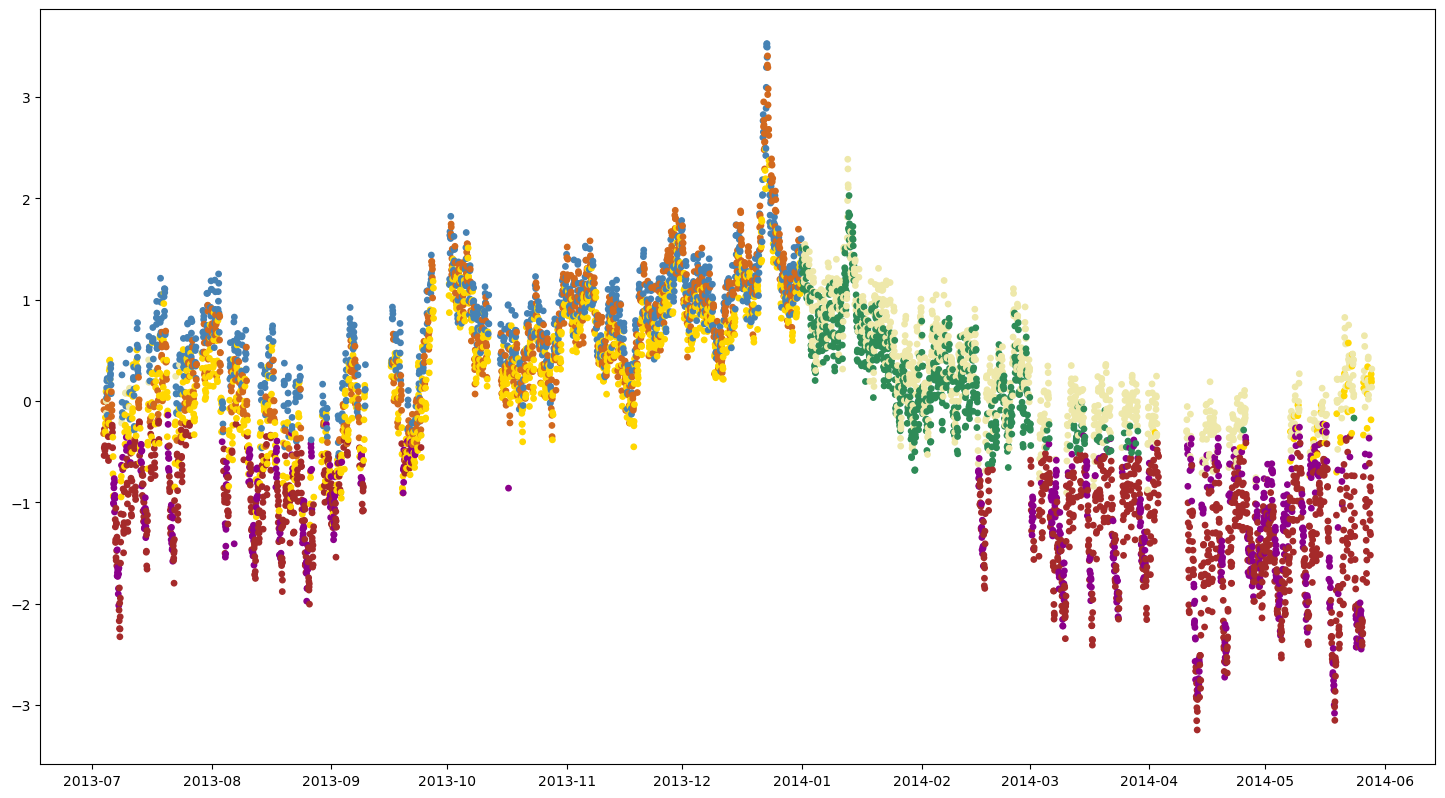

In [55]:
from sklearn.cluster import KMeans
import numpy as np
model = KMeans(n_clusters=7, max_iter=300)
model.fit(dataset.loc[:,'value':'month'])
# Plot the First iteration of the kmean
colormap = np.array(['SeaGreen', 'SteelBlue', 'Brown','Chocolate', 'PaleGoldenRod','DarkMagenta','Gold'])
plt.figure(figsize=(18,10))
plt.scatter(data['timestamp'], data['value'], c=colormap[model.labels_], s=15)